## **Important Links**


[Research paper on on plant disease](https://www.frontiersin.org/articles/10.3389/fpls.2016.01419/full)

[End to End Potato Leaf Disease Prediction Project – A Complete Guide](https://www.analyticsvidhya.com/blog/2021/12/end-to-end-potato-leaf-disease-prediction-project-a-complete-guide/)

[Recommendation system](https://www.analyticsvidhya.com/blog/2021/07/recommendation-system-understanding-the-basic-concepts/)

[GitHub Collaboration Tutorial](https://www.youtube.com/watch?v=jLWZaFzPS6Q&ab_channel=CurranKelleher)

[Krish Deep Learning Playlist](https://www.youtube.com/playlist?list=PLZoTAELRMXVPGU70ZGsckrMdr0FteeRUi)


## **MODEL Preferred**
## We focus on two popular architectures, namely AlexNet (Krizhevsky et al., 2012), and GoogLeNet (Szegedy et al., 2015), which were designed in the context of the **“Large Scale Visual Recognition Challenge”** (ILSVRC) (Russakovsky et al., 2015) for the ImageNet dataset (Deng et al., 2009).



1. ## **ALEXNET**
![](https://www.mdpi.com/remotesensing/remotesensing-09-00848/article_deploy/html/images/remotesensing-09-00848-g001.png)
2. ## **GOOGLENET**
![](https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png)

--------------------------------------------------------
--------------------------------------------------------

# `Potato Diseases with vgg model`

---------------------------------------------------------
----------------------------------------------------------

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
dataset = r'F:\Plant Dataset'
train_path = r'F:\Plant Dataset\Potato_train'
test_path = r'F:\Plant Dataset\Potato_test'

In [3]:
dir_train = os.listdir(train_path)
print(dir_train.__len__()) # number of different classes
print(dir_train)

3
['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']


In [4]:
dir_test = os.listdir(test_path)
print(dir_test.__len__())
print(dir_test)

7
['PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG']


### class path

In [5]:
val = train_path + '\\' + dir_train[0]
val

'F:\\Plant Dataset\\Potato_train\\Potato___Early_blight'

In [6]:
def loading_path(path):
    pathnames = []
    dir_list = os.listdir(path)
    uniq_class = sorted(dir_list)
    for i in range(len(uniq_class)):
        new_path = path + '\\' + uniq_class[i]
        pathnames.append(new_path)
    return (pathnames,uniq_class)

In [7]:
path,classes = loading_path(train_path)

In [8]:
print(path)

['F:\\Plant Dataset\\Potato_train\\Potato___Early_blight', 'F:\\Plant Dataset\\Potato_train\\Potato___Late_blight', 'F:\\Plant Dataset\\Potato_train\\Potato___healthy']


In [9]:
print(classes)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [10]:
def labelling_images(uniq_path,uniq_label):
    img_path = []
    label = []
    for path,Label in zip(uniq_path,uniq_label):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + '\\' + i
            img_path.append(img_dir_list)
            label.append(Label)
    return(img_path,label)

In [11]:
img_path,label = labelling_images(path,classes)

In [12]:
img_path.__len__()

5702

In [13]:
label

['Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___E

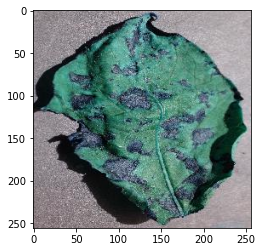

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread(img_path[0])
plt.imshow(img)

In [15]:
labels = np.array(label)
labels

array(['Potato___Early_blight', 'Potato___Early_blight',
       'Potato___Early_blight', ..., 'Potato___healthy',
       'Potato___healthy', 'Potato___healthy'], dtype='<U21')

In [16]:
def img_array(paths):
    arr_list = []
    for i in paths:
        img = cv2.resize(cv2.imread(i),(150,150))
        arr_list.append(img)
    return(arr_list)

### model take data as array

<class 'numpy.ndarray'>


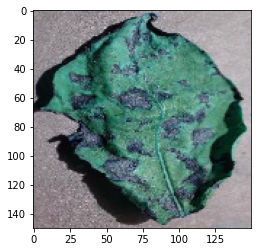

In [17]:
arr_img = img_array(img_path)
arr_img = np.array(arr_img)
print(type(arr_img[0]))
plt.imshow(arr_img[0])

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [19]:
X_train,X_test,y_train,y_test = train_test_split(arr_img,labels,test_size=.2)

In [20]:
print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(4561, 150, 150, 3) 
 (1141, 150, 150, 3) 
 (4561,) 
 (1141,)


### 4561 images for training, (150,150,3) is image
### 1141 images for testing

### One hot encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder
vals = OneHotEncoder()
uniq_labels = np.unique(y_train)
print(uniq_labels.__len__())
y_train_labels = vals.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_labels = vals.fit_transform(y_test.reshape(-1,1)).toarray()

3


In [22]:
y_train_labels[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
y_train[:5]

array(['Potato___healthy', 'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Early_blight', 'Potato___healthy'], dtype='<U21')

In [24]:
y_test_labels[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [25]:
y_test[:5]

array(['Potato___Late_blight', 'Potato___healthy', 'Potato___healthy',
       'Potato___Early_blight', 'Potato___Early_blight'], dtype='<U21')

### model from scratch

In [26]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(Dropout(.1))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

### tarining

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
hist = model.fit(X_train,y_train_labels,batch_size=100,validation_split=0.3,epochs=10,verbose=2)

C:\Users\manuj\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
